In [1]:
import numpy as np
from scipy import optimize
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
import pandas as pd
import helpers
import scipy
import itertools

# 7.18

In [24]:
p_er = 0.3
p_pl = 0.3
n = 1000
m = 4 
ER = nx.erdos_renyi_graph(n, p_er)
PL = nx.powerlaw_cluster_graph(n, m, p_pl)

In [25]:
def return_biggest_cluster(G): 
    return max([len(x) for x in list(nx.connected_components(G))])

def return_biggest_hub(G): 
    return max(dict(G.degree).values())

def return_biggest_cluster_node(G): 
    max_degree = return_biggest_hub(G)
    return [node_id for node_id, degree in dict(G.degree).items() if degree == max_degree][0]

In [26]:
def disable_random_node(G):
    node_id = np.random.choice(G.nodes)
    G.remove_node(node_id)
    return G

def disable_best_node(G):
    node_id = return_biggest_cluster_node(G)
    G.remove_node(node_id)
    return G

In [27]:
def perform_deleting_nodes(G, del_fun): 
    G_to_delete = G.copy()
    biggest_clusters = []
    biggest_degree = []
    max_deletions = G_to_delete.number_of_edges() + 1
    for no_deleted in range(max_deletions):
        if G_to_delete.number_of_nodes() == 1: 
            max_deletions = no_deleted
            break
        if no_deleted != 0: 
            G_to_delete = del_fun(G_to_delete)
            
        biggest_clusters.append(return_biggest_cluster(G_to_delete))
        biggest_degree.append(return_biggest_hub(G_to_delete))
    return np.arange(max_deletions), np.array(biggest_clusters), np.array(biggest_degree)

In [28]:
no_nodes = {'ER': ER.number_of_nodes(), 'free-scale': PL.number_of_nodes()}
graphs = {'ER': ER, 'free-scale': PL}
funs_del = {'best hub': disable_best_node, 'random node': disable_random_node}

ER best hub
ER random node
free-scale best hub
free-scale random node


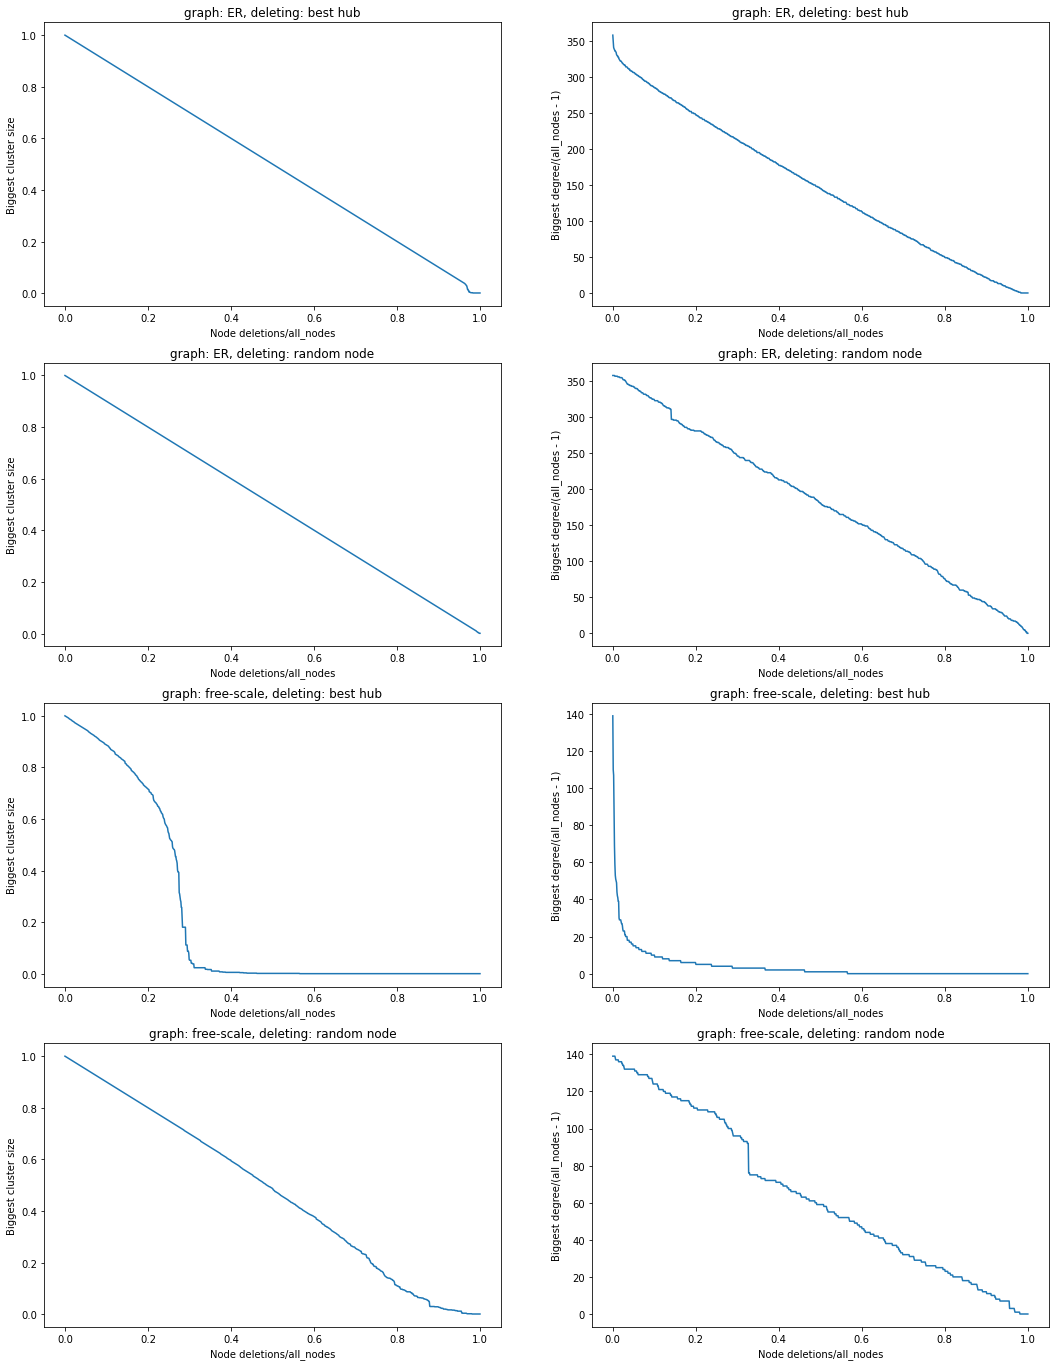

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9*2,6*4))
axs = axs.flatten()
for i, (graph_name, graph) in enumerate(graphs.items()): 
    for j, (fun_name, del_fun) in enumerate(funs_del.items()): 
        print(graph_name, fun_name)
        ax_idx = 4*i+2*j
        deletions, biggest_clusters, biggest_degree = perform_deleting_nodes(graph, del_fun)
        deletions = deletions/(no_nodes[graph_name] - 1) 
        biggest_clusters = biggest_clusters/n
        axs[ax_idx].plot(deletions, biggest_clusters)
        axs[ax_idx].set_xlabel('Node deletions/all_nodes')
        axs[ax_idx].set_ylabel('Biggest cluster size')
        axs[ax_idx].set_title(f'graph: {graph_name}, deleting: {fun_name}')
        
        axs[ax_idx+1].plot(deletions, biggest_degree)
        axs[ax_idx+1].set_xlabel('Node deletions/all_nodes')
        axs[ax_idx+1].set_ylabel('Biggest degree/(all_nodes - 1)')
        axs[ax_idx+1].set_title(f'graph: {graph_name}, deleting: {fun_name}')

### P7.19
Random graphs are more robust because there are roughly no nodes that are more important than others.
Free scale networkx are more resistant to random node deleting than best hub deleting. 